In [70]:
import pandas as pd #to reading data_set
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("C:\\Users\\ALTHOURAYA\\.anaconda\\AI-College-Project\\Data_preprocessing\\Final_Data.csv")

In [71]:
data.shape

(101766, 73)

In [72]:
data.head(5)

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_emergency,...,d3_Circulatory,d3_Diabetes,d3_Digestive,d3_External_causes,d3_Genitourinary,d3_Injury,d3_Musculoskeletal,d3_Neoplasms,d3_Respiratory,d3_Supplementary_classification
0,0,1,0,4,1,16,41,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,2,3,6,59,0,18,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,2,2,6,11,5,13,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,2,2,6,44,1,16,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,2,1,6,51,0,8,0,...,0,1,0,0,0,0,0,0,0,0


In [73]:
for col in data.columns: # to know num of un values + print the largest five ones !
    print (col ,": " ,data[col].nunique())
    print(data[col].value_counts().nlargest(5))
    print('\n')


gender :  2
gender
0    54711
1    47055
Name: count, dtype: int64


admission_type_id :  5
admission_type_id
1    64386
0    18869
4    18480
3       21
2       10
Name: count, dtype: int64


discharge_disposition_id :  8
discharge_disposition_id
0    70031
2    13954
5    12902
3     2128
4     1184
Name: count, dtype: int64


admission_source_id :  8
admission_source_id
2    64588
4    29565
6     3187
7     2264
0     1104
Name: count, dtype: int64


time_in_hospital :  12
time_in_hospital
3    17756
2    17224
1    14208
4    13924
5     9966
Name: count, dtype: int64


medical_specialty :  29
medical_specialty
6     64584
1      7565
3      7440
0      5352
24     3099
Name: count, dtype: int64


num_lab_procedures :  96
num_lab_procedures
1     3208
43    2804
44    2496
45    2376
38    2213
Name: count, dtype: int64


num_procedures :  6
num_procedures
0    46652
1    20742
2    12717
3     9443
5     8032
Name: count, dtype: int64


num_medications :  35
num_medications
13   

In [74]:
cat_col=["gender",
         "admission_type_id",
         "discharge_disposition_id",
         "admission_source_id",
         "medical_specialty",
         "max_glu_serum",
         "A1Cresult",
         "readmitted"        
]
#8 columns


In [75]:
# Reverse mapping dictionaries (only for cat_col fields)
decode_maps = {
    "gender": {0: "Female", 1: "Male"},
    "admission_type_id": {
        0: "Elective", 1: "Emergency", 2: "Newborn", 3: "Trauma Center", 4: "Urgent"
    },
    "discharge_disposition_id": {
        0: "Discharged to home",
        1: "Discharged/transferred to ICF",
        2: "Discharged/transferred to SNF",
        3: "Discharged/transferred to another short term hospital",
        4: "Discharged/transferred to another type of inpatient care institution",
        5: "Discharged/transferred to home with home health service",
        6: "Left AMA",
        7: "Other"
    },
    "admission_source_id": {
        0: "Clinic Referral",
        1: "Court/Law Enforcement",
        2: "Emergency Room",
        3: "HMO Referral",
        4: "Physician Referral",
        5: "Transfer from a Skilled Nursing Facility (SNF)",
        6: "Transfer from a hospital",
        7: "Transfer from another health care facility"
    },
    "medical_specialty": {
        0: "Cardiology", 1: "Emergency/Trauma", 2: "Endocrinology", 3: "Family/GeneralPractice",
        4: "Gastroenterology", 5: "Hematology/Oncology", 6: "InternalMedicine", 7: "Nephrology",
        8: "Neurology", 9: "ObstetricsandGynecology", 10: "Oncology", 11: "Orthopedics",
        12: "Orthopedics-Reconstructive", 13: "Other", 14: "Otolaryngology", 15: "Pediatrics",
        16: "Pediatrics-Endocrinology", 17: "PhysicalMedicineandRehabilitation", 18: "Podiatry",
        19: "Psychiatry", 20: "Psychology", 21: "Pulmonology", 22: "Radiologist",
        23: "Surgery-Cardiovascular/Thoracic", 24: "Surgery-General", 25: "Surgery-Neuro",
        26: "Surgery-Thoracic", 27: "Surgery-Vascular", 28: "Urology"
    },
    "max_glu_serum": {0: ">200", 1: ">300", 2: "Norm"},
    "A1Cresult": {0: ">7", 1: ">8", 2: "Norm"},
    "readmitted": {0:'<30',1:'>30',2:'NO'}
}

# Decode the specified categorical columns
for col, reverse_map in decode_maps.items():
    if col in data.columns:
        data[col] = data[col].map(reverse_map)


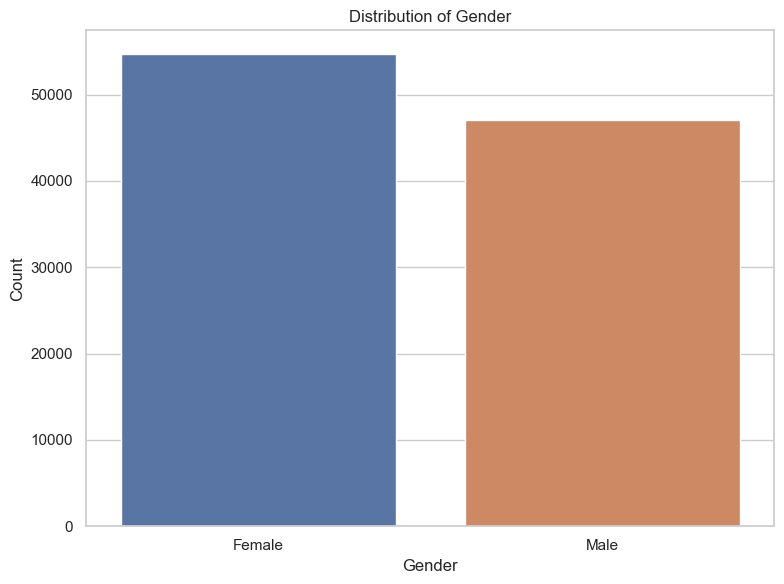

In [76]:

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', order=data['gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

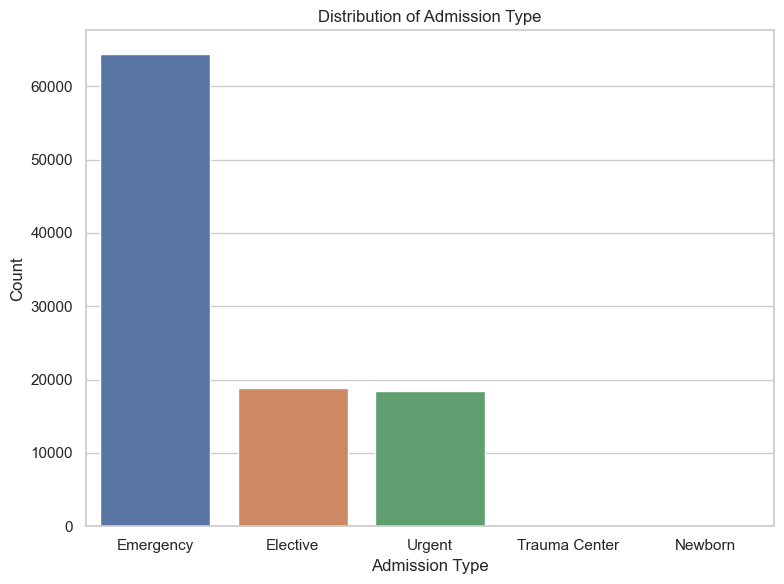

In [77]:
# admission_type_id column

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='admission_type_id', order=data['admission_type_id'].value_counts().index)
plt.title('Distribution of Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


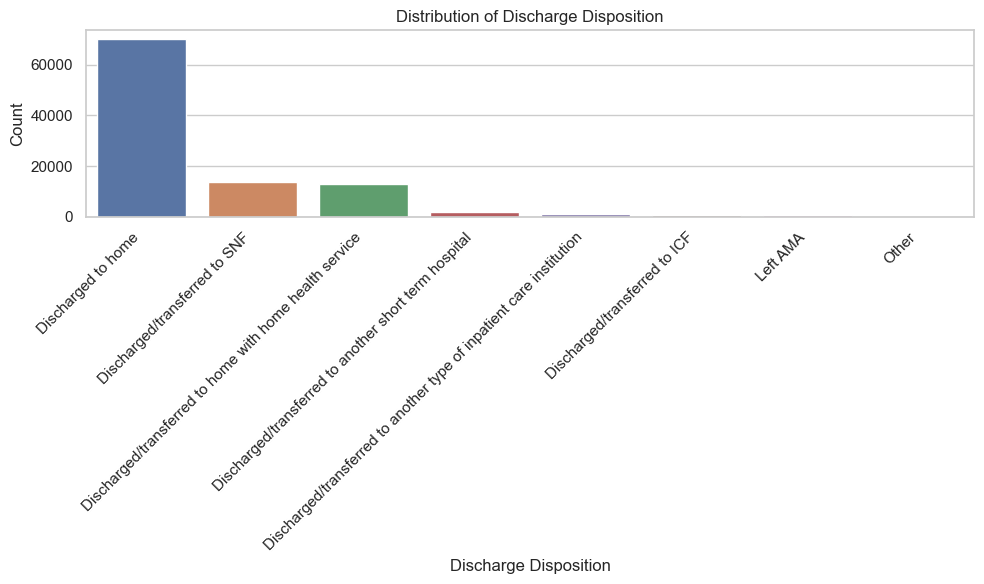

In [78]:
# discharge_disposition_id column

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='discharge_disposition_id', order=data['discharge_disposition_id'].value_counts().index)
plt.title('Distribution of Discharge Disposition')
plt.xlabel('Discharge Disposition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate for clarity
plt.tight_layout()
plt.show()


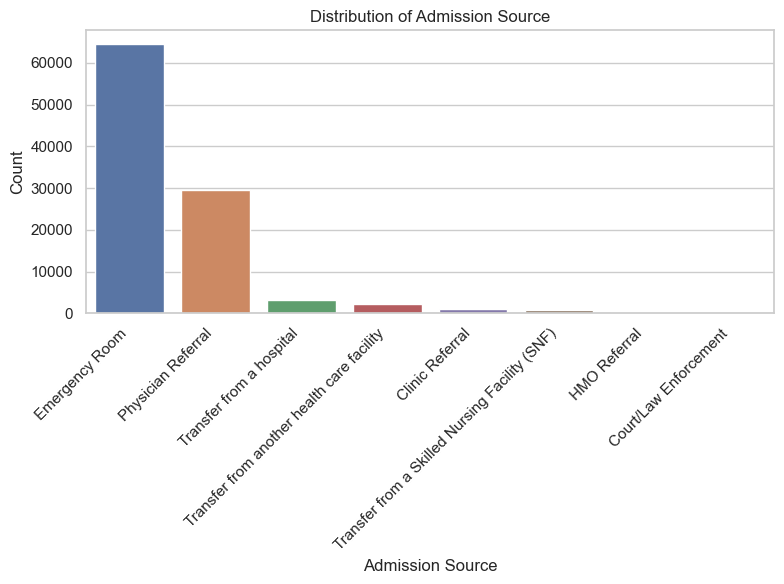

In [79]:
# admission_source_id column

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='admission_source_id', order=data['admission_source_id'].value_counts().index)
plt.title('Distribution of Admission Source')
plt.xlabel('Admission Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate for clarity
plt.tight_layout()
plt.show()


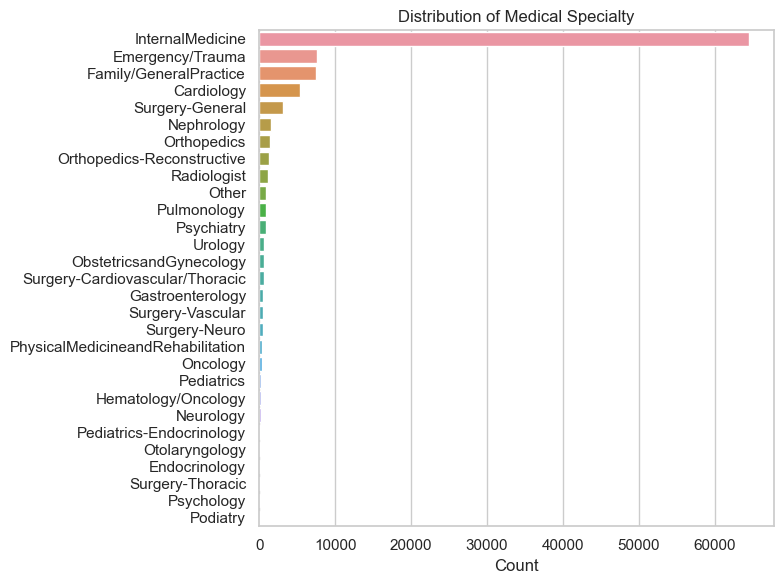

In [80]:
# medical_specialty column 

plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='medical_specialty', order=data['medical_specialty'].value_counts().index)
plt.title('Distribution of Medical Specialty')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
plt.show()


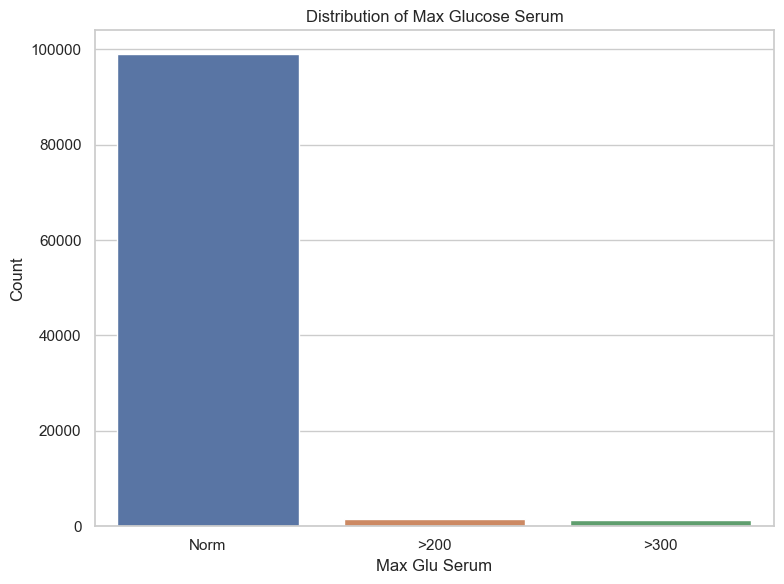

In [81]:
# max_glu_serum column 

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='max_glu_serum', order=data['max_glu_serum'].value_counts().index)
plt.title('Distribution of Max Glucose Serum')
plt.xlabel('Max Glu Serum')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


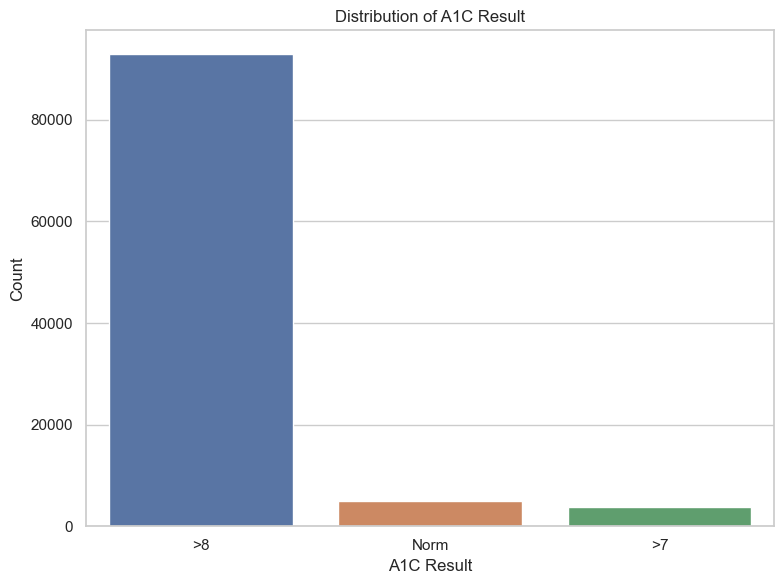

In [82]:
# A1Cresult column

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='A1Cresult', order=data['A1Cresult'].value_counts().index)
plt.title('Distribution of A1C Result')
plt.xlabel('A1C Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


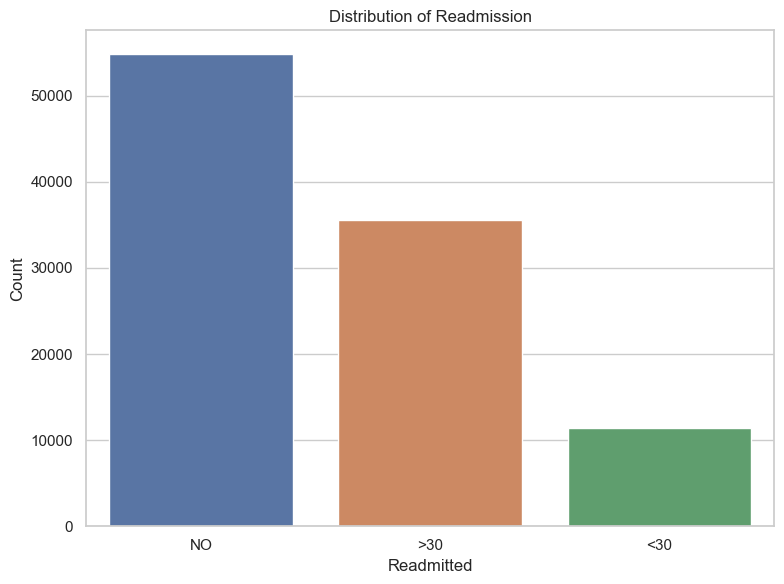

In [85]:
# readmitted column (target)

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='readmitted')
plt.title('Distribution of Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


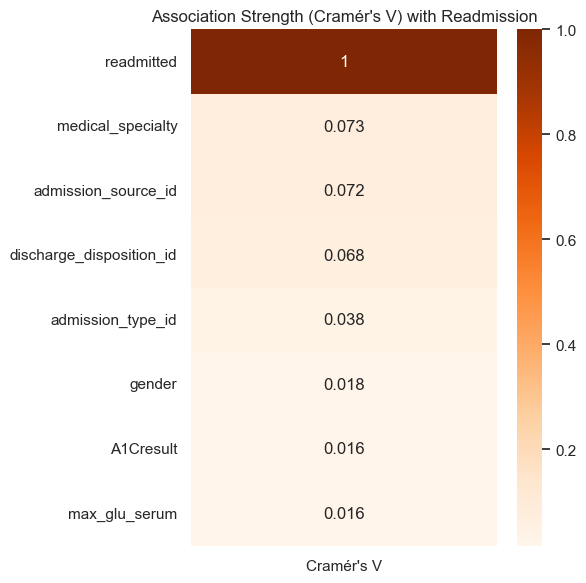

In [86]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

assoc_scores = {}

for col in cat_col:
    confusion_mat = pd.crosstab(data[col], data['readmitted'])
    assoc_scores[col] = cramers_v(confusion_mat)

# Convert to DataFrame for heatmap
assoc_df = pd.DataFrame.from_dict(assoc_scores, orient='index', columns=['Cramér\'s V'])

plt.figure(figsize=(6, 6))
sns.heatmap(assoc_df.sort_values(by="Cramér's V", ascending=False), annot=True, cmap='Oranges')
plt.title("Association Strength (Cramér's V) with Readmission")
plt.tight_layout()
plt.show()
